In [1]:
import numpy as np
from scipy.optimize import curve_fit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from persim import PersImage
import gudhi
import os
import glob
from matplotlib import ticker, cm
from matplotlib.colors import LogNorm
from sklearn.cluster import KMeans
import time
from sklearn.decomposition import PCA
import matplotlib as mpl
from sklearn import preprocessing

In [37]:
flist=np.sort(glob.glob("new2DZ2/*Data*/*/*.txt"))

In [38]:
for f in flist:
    t0 = time.time()
    data = np.loadtxt(f, dtype=int)
    alpha_complex=gudhi.AlphaComplex(data)
    simplex_tree=alpha_complex.create_simplex_tree()
    PD=simplex_tree.persistence()
    PD0=[]
    PD1=[]
    for elm in PD:
        if elm[0]==1:
            PD1.append((elm[1][0],elm[1][1]-elm[1][0]))
        else:
            if elm[1][1]!=float('inf'):
                PD0.append((elm[1][0],elm[1][1]-elm[1][0]))
    PD0=np.round(PD0,decimals=5)
    PD1=np.round(PD1,decimals=5)
    loc,counts=np.unique(PD0,axis=0,return_counts=True)
    toSave=np.array([[loc[i][0],loc[i][1],counts[i]] for i in np.arange(len(counts))])
    np.savetxt(f[:len(f)-4]+"PD0.dat",toSave)
    loc,counts=np.unique(PD1,axis=0,return_counts=True)
    toSave=np.array([[loc[i][0],loc[i][1],counts[i]] for i in np.arange(len(counts))])
    np.savetxt(f[:len(f)-4]+"PD1.dat",toSave)
    print(f, time.time() - t0)

new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553278882.txt 0.38201475143432617
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553278898.txt 0.3590087890625
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553278915.txt 0.38701534271240234
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553278916.txt 0.36696934700012207
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553278926.txt 0.3620340824127197
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553278955.txt 0.37296628952026367
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553278971.txt 0.3800210952758789
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553278991.txt 0.38397216796875
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553278993.txt 0.3649888038635254
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553279014.txt 0.3670201301574707
new2DZ2\Data_2d_Z2_Ising_Met_N=

new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553280184.txt 0.36509180068969727
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553280200.txt 0.41980886459350586
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553280213.txt 0.42685914039611816
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553280238.txt 0.36908411979675293
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553280240.txt 0.3849661350250244
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553280244.txt 0.36499524116516113
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553280284.txt 0.3690168857574463
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553280287.txt 0.36302685737609863
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553280291.txt 0.37699317932128906
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553280315.txt 0.3720052242279053
new2DZ2\Data_2d_Z2_Isin

new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553281483.txt 0.42885351181030273
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553281504.txt 0.4777238368988037
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553281516.txt 0.39301252365112305
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553281519.txt 0.4129064083099365
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553281557.txt 0.4288201332092285
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553281560.txt 0.48270177841186523
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553281572.txt 0.4118978977203369
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553281575.txt 0.4956796169281006
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553281604.txt 0.428849458694458
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553281625.txt 0.43184542655944824
new2DZ2\Data_2d_Z2_Ising_Me

new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553282733.txt 0.3759958744049072
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553282745.txt 0.36805081367492676
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553282759.txt 0.3739655017852783
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553282767.txt 0.3860166072845459
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553282789.txt 0.373950719833374
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553282807.txt 0.3730030059814453
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553282823.txt 0.37403440475463867
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553282833.txt 0.3739664554595947
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553282835.txt 0.37998437881469727
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553282876.txt 0.37699198722839355
new2DZ2\Data_2d_Z2_Ising_Me

new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553284000.txt 0.37100863456726074
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553284012.txt 0.36609506607055664
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553284018.txt 0.3629579544067383
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553284054.txt 0.3640248775482178
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553284062.txt 0.3700110912322998
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553284077.txt 0.3650848865509033
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553284105.txt 0.3669569492340088
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553284110.txt 0.36395883560180664
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553284131.txt 0.4009284973144531
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553284139.txt 0.3670220375061035
new2DZ2\Data_2d_Z2_Ising_Me

new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553285315.txt 0.37901902198791504
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553285321.txt 0.3729712963104248
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553285327.txt 0.3690826892852783
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553285342.txt 0.36994123458862305
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553285376.txt 0.3650243282318115
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553285382.txt 0.36901235580444336
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553285388.txt 0.3620328903198242
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553285390.txt 0.3749980926513672
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553285430.txt 0.36807894706726074
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553285433.txt 0.36894941329956055
new2DZ2\Data_2d_Z2_Ising_

new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553286507.txt 0.3670196533203125
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553286540.txt 0.36801719665527344
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553286541.txt 0.37100815773010254
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553286559.txt 0.3680152893066406
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553286566.txt 0.36908626556396484
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553286584.txt 0.3719916343688965
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553286591.txt 0.3689541816711426
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553286624.txt 0.37406468391418457
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553286628.txt 0.3679516315460205
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553286629.txt 0.36003971099853516
new2DZ2\Data_2d_Z2_Ising_

new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553287664.txt 0.4138913154602051
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553287676.txt 0.42186689376831055
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553287684.txt 0.3819096088409424
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553287687.txt 0.3749978542327881
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553287715.txt 0.3700437545776367
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553287731.txt 0.37197160720825195
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553287735.txt 0.413893461227417
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553287740.txt 0.3740541934967041
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553287766.txt 0.3729977607727051
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553287775.txt 0.3700294494628906
new2DZ2\Data_2d_Z2_Ising_Met_

new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553288801.txt 0.3680400848388672
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553288827.txt 0.36998891830444336
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553288833.txt 0.37104201316833496
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553288849.txt 0.36901092529296875
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553288869.txt 0.36602044105529785
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553288870.txt 0.3640263080596924
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553288883.txt 0.3710174560546875
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553288910.txt 0.3690042495727539
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553288914.txt 0.37200236320495605
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553288932.txt 0.36901330947875977
new2DZ2\Data_2d_Z2_Ising

new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553289956.txt 0.3670032024383545
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553289967.txt 0.3760344982147217
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553290002.txt 0.3719668388366699
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553290005.txt 0.38398051261901855
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553290029.txt 0.4408552646636963
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553290054.txt 0.3739938735961914
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553290067.txt 0.3869316577911377
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553290082.txt 0.3662385940551758
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553290103.txt 0.3690183162689209
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553290133.txt 0.3650848865509033
new2DZ2\Data_2d_Z2_Ising_Met_

new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553291603.txt 0.37100887298583984
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553291629.txt 0.37506628036499023
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553291637.txt 0.43879222869873047
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553291670.txt 0.3759605884552002
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553291686.txt 0.36904430389404297
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553291687.txt 0.3700118064880371
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553291734.txt 0.3700408935546875
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553291735.txt 0.3739345073699951
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553291749.txt 0.36901378631591797
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553291785.txt 0.3720054626464844
new2DZ2\Data_2d_Z2_Ising_

new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553294358.txt 0.3709695339202881
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553294391.txt 0.36602163314819336
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553294432.txt 0.37104129791259766
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553294468.txt 0.3610396385192871
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553294505.txt 0.3629906177520752
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553294542.txt 0.3640251159667969
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553294579.txt 0.3670177459716797
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553294617.txt 0.36903834342956543
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553294653.txt 0.3730597496032715
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1.0000000000000001e-07\1553294692.txt 0.36203646659851074
new2DZ2\Data_2d_Z2_Ising_M

new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553279885.txt 0.36901330947875977
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553279927.txt 0.37100911140441895
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553279928.txt 0.36602139472961426
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553279963.txt 0.3649885654449463
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553279967.txt 0.3690071105957031
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553279972.txt 0.36505722999572754
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553280015.txt 0.37100815773010254
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553280026.txt 0.38294267654418945
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553280038.txt 0.37400078773498535
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553280043.txt 0.37399935722351074
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553280059.txt 0.3780252933502197
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553280102.txt 0.372967004776001
new2DZ2\Data_2d_Z2_Is

new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553281639.txt 0.6761624813079834
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553281651.txt 0.647270679473877
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553281684.txt 0.5336041450500488
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553281711.txt 0.6123623847961426
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553281721.txt 0.536569356918335
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553281722.txt 0.5555167198181152
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553281729.txt 0.494718074798584
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553281774.txt 0.5135831832885742
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553281789.txt 0.5365960597991943
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553281793.txt 0.48270630836486816
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553281816.txt 0.49866652488708496
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553281819.txt 0.6422500610351562
new2DZ2\Data_2d_Z2_Ising_Met_

new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553283408.txt 0.40392041206359863
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553283412.txt 0.37898755073547363
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553283447.txt 0.393979549407959
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553283472.txt 0.38294363021850586
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553283480.txt 0.3989596366882324
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553283483.txt 0.38796234130859375
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553283492.txt 0.3789863586425781
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553283537.txt 0.39893412590026855
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553283544.txt 0.38596630096435547
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553283552.txt 0.39495229721069336
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553283565.txt 0.3839378356933594
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553283582.txt 0.38498401641845703
new2DZ2\Data_2d_Z2_Is

new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553285074.txt 0.4637603759765625
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553285087.txt 0.569476842880249
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553285095.txt 0.47373318672180176
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553285117.txt 0.491746187210083
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553285119.txt 0.44275784492492676
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553285153.txt 0.4767599105834961
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553285164.txt 0.4417860507965088
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553285176.txt 0.461763858795166
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553285190.txt 0.46575403213500977
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553285210.txt 0.4507944583892822
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553285218.txt 0.47576379776000977
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553285255.txt 0.4557459354400635
new2DZ2\Data_2d_Z2_Ising_Me

new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553286762.txt 0.39594054222106934
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553286767.txt 0.38897061347961426
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553286794.txt 0.38996076583862305
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553286809.txt 0.3919510841369629
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553286828.txt 0.38802385330200195
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553286832.txt 0.3968842029571533
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553286838.txt 0.420867919921875
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553286881.txt 0.38496994972229004
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553286887.txt 0.41289567947387695
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553286895.txt 0.3949761390686035
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553286898.txt 0.3859379291534424
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553286925.txt 0.3869640827178955
new2DZ2\Data_2d_Z2_Isin

new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553288324.txt 0.3899245262145996
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553288346.txt 0.3869662284851074
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553288354.txt 0.385967493057251
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553288366.txt 0.3939483165740967
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553288402.txt 0.3919651508331299
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553288409.txt 0.39001965522766113
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553288412.txt 0.38195037841796875
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553288429.txt 0.38596558570861816
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553288453.txt 0.37998414039611816
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553288478.txt 0.3889279365539551
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553288497.txt 0.40591883659362793
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553288518.txt 0.6502625942230225
new2DZ2\Data_2d_Z2_Ising

new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553289949.txt 0.38602375984191895
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553289976.txt 0.3829219341278076
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553289984.txt 0.38699865341186523
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553289992.txt 0.3840045928955078
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553290000.txt 0.38593387603759766
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553290052.txt 0.3770267963409424
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553290068.txt 0.4158515930175781
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553290073.txt 0.3820164203643799
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553290106.txt 0.37791967391967773
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553290144.txt 0.37901949882507324
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553290157.txt 0.3729696273803711
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553290160.txt 0.3969380855560303
new2DZ2\Data_2d_Z2_Isin

new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553292272.txt 0.4028892517089844
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553292309.txt 0.39498305320739746
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553292321.txt 0.3849344253540039
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553292362.txt 0.38596463203430176
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553292382.txt 0.38201260566711426
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553292384.txt 0.3959381580352783
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553292435.txt 0.38294315338134766
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553292447.txt 0.4049215316772461
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553292458.txt 0.381969690322876
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553292500.txt 0.3999323844909668
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553292533.txt 0.3919844627380371
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553292536.txt 0.3879282474517822
new2DZ2\Data_2d_Z2_Ising_

new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553294855.txt 0.4029536247253418
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553294866.txt 0.4088749885559082
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553294929.txt 0.3959767818450928
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553294952.txt 0.3929128646850586
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553295005.txt 0.3970022201538086
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553295038.txt 0.3989071846008301
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553295080.txt 0.4038839340209961
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553295120.txt 0.40192246437072754
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553295154.txt 0.39401769638061523
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553295209.txt 0.40887022018432617
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553295229.txt 0.40491533279418945
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553295297.txt 0.4976999759674072
new2DZ2\Data_2d_Z2_Ising

new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553300524.txt 0.43184661865234375
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553300596.txt 0.4008946418762207
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553300675.txt 0.4308493137359619
new2DZ2\Data_2d_Z2_Ising_Met_N=50_K=200\1000.0\1553300750.txt 0.41588807106018066


In [41]:
#pdlocnum has format [[birth1, persistence1, counts1],...]
#bounds should be a list [bmin,bmax,pmin,pmax]
#bins should be a list [bbins, pbins]
def PerIm(pdloc,bounds,bins,stdev,res=1000):
    x = np.linspace(bounds[0], bounds[1], res)
    y = np.linspace(bounds[2], bounds[3], res)
    xx, yy = np.meshgrid(x, y, sparse=True)
    z=np.zeros([res,res])
    for i in np.arange(len(pdloc)):
        z=z+pdloc[i][1]*pdloc[i][2]*np.exp((-0.5*(xx-pdloc[i][0])**2-0.5*(yy-pdloc[i][1])**2)*stdev**-2)
    return z.reshape(bins[0],res//bins[0],bins[1],res//bins[1]).sum(3).sum(1)

In [42]:
#pdlocnum has format [[birth1, persistence1, counts1],...]
#bounds should be a list [pmin,pmax]
#bins should be pbins
def PerIm0(pdlocnum,bounds,bins,stdev,res=1000):
    if len(np.shape(pdlocnum))==1:
        pdlocnum = np.array([pdlocnum])
    
    y = np.linspace(bounds[0], bounds[1], res)
    z=np.zeros(res)
    for i in np.arange(len(pdlocnum)):
        z=z+np.log(1+pdlocnum[i][1])*pdlocnum[i][2]*np.exp((-0.5*(y-pdlocnum[i][1])**2)*stdev**-2)
    return z.reshape(bins,res//bins).sum(1)

In [55]:
fPD0list=np.sort(glob.glob("new2DZ2/*/*/*PD0.dat"))
fPD0list[-1][41]
TPD0list=[]
for f in fPD0list:
    if f[41]=='.':
        TPD0list.append(0)
    else:
        TPD0list.append(1000)

fPD1list=np.sort(glob.glob("new2DZ2/*/*/*PD1.dat"))
TPD1list=[]
for f in fPD1list:
    if f[41]=='.':
        TPD1list.append(0)
    else:
        TPD1list.append(1000)

In [56]:
pds0=[np.loadtxt(f) for f in fPD0list]
pds1=[np.loadtxt(f) for f in fPD1list]

In [57]:
bounds=[0,5]
bins=10
res=bins*10

imgs0 = [PerIm0(p,bounds,bins,1,res=res) for p in pds0]

In [58]:
bounds=[0,5,0,5]
bins=[10,10]
res=bins[0]*10

imgs1=[PerIm(pd,bounds,bins,1,res=res) for pd in pds1]

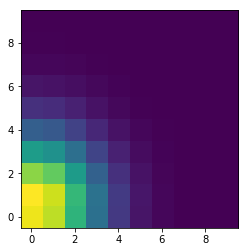

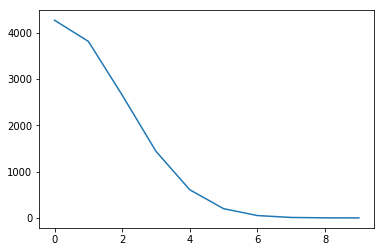

In [62]:
plt.imshow(imgs1[0],origin='lower')
plt.show()
plt.plot(imgs0[0])
plt.show()

In [63]:
imgs0_array=np.array(imgs0)
imgs1_array=np.array([img.flatten() for img in imgs1])
imgs01_array=np.array([np.append(imgs0_array[i],imgs1_array[i]).flatten() for i in range(len(imgs0_array))])

In [119]:
labels=[int(t<10) for t in TPD1list]

In [125]:
X_train, X_test, y_train, y_test, T_train, T_test = train_test_split(imgs01_array, labels, TPD0list, test_size=0.5)

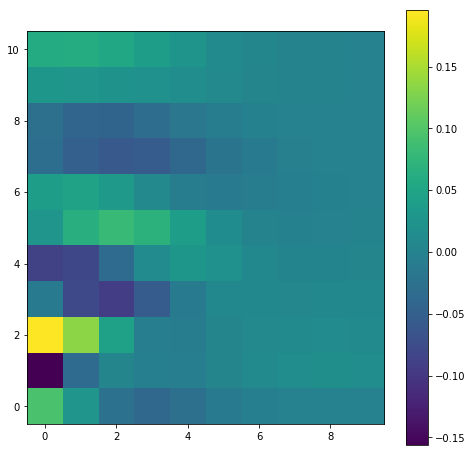

In [126]:
logreg = LogisticRegression(C=0.1, solver='liblinear', penalty='l2')
logreg.fit(X_train, y_train)

inverse_image = np.copy(logreg.coef_).reshape((11,10))
fig, ax = plt.subplots(figsize=(8,8))
cs = ax.imshow(inverse_image, origin='lower')
cbar = fig.colorbar(cs)

In [127]:
pred = logreg.predict(X_test)
diff = abs(pred-y_test)
TT = np.array([0,1000])
avg = np.zeros(len(TT))
acc = np.zeros(len(TT))
for i in np.arange(len(TT)):
    avg[i] = np.mean(pred[np.where(T_test==TT[i])[0]])
    acc[i] = np.mean(1-diff[np.where(T_test==TT[i])[0]])

print(acc)

[0.96210526 0.98387097]


**PCA**

In [128]:
pca = PCA(n_components=2)
X_r = pca.fit(imgs01_array).transform(imgs01_array)

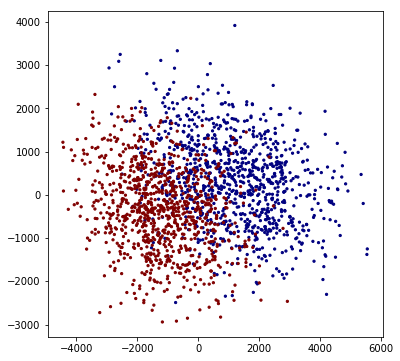

In [129]:
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111, projection='3d')
# ax.view_init(20,130)
fig, ax = plt.subplots(1,1, figsize=(6,6))
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,1,3)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
scat = ax.scatter([elm[0] for elm in X_r],[elm[1] for elm in X_r],c=TPD1list,s=5,cmap=cmap, norm=norm)
# cbar = fig.colorbar(scat)
plt.show()

In [130]:
X_train, X_test, y_train, y_test, T_train, T_test = train_test_split(X_r, labels, TPD1list, test_size=0.5)

In [131]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)

In [132]:
pred = kmeans.predict(X_test)
diff = abs(pred - y_test)
TT = np.unique(T_test)
TT = np.round(TT, decimals=3)
avg = np.zeros(len(TT))
acc = np.zeros(len(TT))
for i in np.arange(len(TT)):
    avg[i] = np.mean(pred[np.where(T_test==TT[i])[0]])
    acc[i] = np.mean(1-diff[np.where(T_test==TT[i])[0]])

print(avg,acc)

[0.71881188 0.15450644] [0.71881188 0.84549356]
